# 3.1. 내가 만약 축구팀 감독이라면

## 3.1.1. 데이터 수집하기

In [91]:
import pandas as pd

fifa2019 = pd.read_csv('fifa2019.csv')

print(fifa2019.shape)


(18207, 89)


In [92]:
print(fifa2019.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

## 3.1.2. 데이터 다루기

In [93]:
sub1 = fifa2019.loc[14]
print(sub1)

Unnamed: 0                                                    14
ID                                                        215914
Name                                                    N. Kanté
Age                                                           27
Photo             https://cdn.sofifa.org/players/4/19/215914.png
                                       ...                      
GKHandling                                                  12.0
GKKicking                                                   10.0
GKPositioning                                                7.0
GKReflexes                                                  10.0
Release Clause                                           €121.3M
Name: 14, Length: 89, dtype: object


In [94]:
sub2 = fifa2019.loc[2:16]
print(sub2)

    Unnamed: 0      ID            Name  Age  \
2            2  190871       Neymar Jr   26   
3            3  193080          De Gea   27   
4            4  192985    K. De Bruyne   27   
5            5  183277       E. Hazard   27   
6            6  177003       L. Modrić   32   
7            7  176580       L. Suárez   31   
8            8  155862    Sergio Ramos   32   
9            9  200389        J. Oblak   25   
10          10  188545  R. Lewandowski   29   
11          11  182521        T. Kroos   28   
12          12  182493        D. Godín   32   
13          13  168542     David Silva   32   
14          14  215914        N. Kanté   27   
15          15  211110       P. Dybala   24   
16          16  202126         H. Kane   24   

                                             Photo Nationality  \
2   https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4   https://cdn.sofifa.org/players/4/19/192985.pn

In [95]:
sub3 = fifa2019.loc[:, ['Name', 'Preferred Foot']]
print(sub3)

                     Name Preferred Foot
0                L. Messi           Left
1       Cristiano Ronaldo          Right
2               Neymar Jr          Right
3                  De Gea          Right
4            K. De Bruyne          Right
...                   ...            ...
18202        J. Lundstram          Right
18203  N. Christoffersson          Right
18204           B. Worman          Right
18205      D. Walker-Rice          Right
18206           G. Nugent          Right

[18207 rows x 2 columns]


In [96]:
sub4 = fifa2019.iloc[0:10, 1:3]
print(sub4)

       ID               Name
0  158023           L. Messi
1   20801  Cristiano Ronaldo
2  190871          Neymar Jr
3  193080             De Gea
4  192985       K. De Bruyne
5  183277          E. Hazard
6  177003          L. Modrić
7  176580          L. Suárez
8  155862       Sergio Ramos
9  200389           J. Oblak


## 3.1.3. 데이터 시각화하기

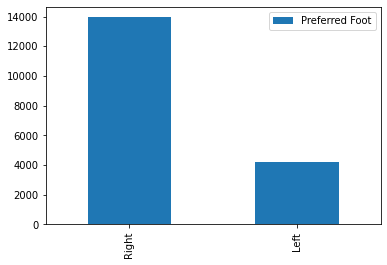

In [97]:
import matplotlib.pyplot as plt

fifa2019['Preferred Foot'].value_counts().plot(kind='bar')
plt.legend()
plt.show()

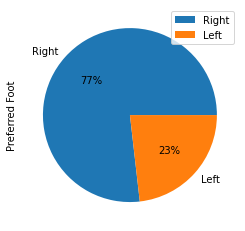

In [98]:
fifa2019['Preferred Foot'].value_counts().plot(kind='pie', autopct='%1.f%%')
plt.legend()
plt.show()

## 3.1.4. 학습하기


데이터를 불러온다. 전반적인 능력치(`Overall`)를 기준으로 내림차순 정렬하여 200명을 선발한다.
각 선수의 특성 중 일부를 선택해 데이터 프레임 구조를 만들어 5개 행을 출력한다.

In [99]:
df = pd.DataFrame.copy(fifa2019.sort_values(by='Overall', ascending=False).head(200))
test_features = ['Name', 'Stamina', 'Dribbling', 'ShortPassing', 'Penalties']
test_df = pd.DataFrame(df, columns=test_features)
print(test_df.head(5))

                Name  Stamina  Dribbling  ShortPassing  Penalties
0           L. Messi     72.0       97.0          90.0       75.0
1  Cristiano Ronaldo     88.0       88.0          81.0       85.0
2          Neymar Jr     81.0       96.0          84.0       81.0
3             De Gea     43.0       18.0          50.0       40.0
4       K. De Bruyne     90.0       86.0          92.0       79.0


학습 데이터를 준비한다. 데이터 프레임 구조를 2차원 배열로 변환한다.
배열 `XY`의 특성 열은 `Name`, `Stamina`, `Dribbling`, `ShortPassing`, `Penalties` 순으로 정렬되어 있다.
이중 두 번째와 세 번째 열의 모든 행이 필요하므로, `XY[:, 1:3]`을 슬라이싱해 새로운 배열 `X`를 만든다.

In [100]:
import numpy as np

XY = np.array(test_df)
X = XY[:, 1:3]
print(X)

[[72.0 97.0]
 [88.0 88.0]
 [81.0 96.0]
 [43.0 18.0]
 [90.0 86.0]
 [83.0 95.0]
 [89.0 90.0]
 [90.0 87.0]
 [84.0 63.0]
 [66.0 53.0]
 [78.0 89.0]
 [41.0 12.0]
 [75.0 81.0]
 [78.0 85.0]
 [86.0 80.0]
 [65.0 58.0]
 [76.0 89.0]
 [43.0 30.0]
 [92.0 80.0]
 [89.0 80.0]
 [38.0 13.0]
 [35.0 17.0]
 [83.0 88.0]
 [80.0 92.0]
 [96.0 79.0]
 [66.0 68.0]
 [39.0 26.0]
 [41.0 12.0]
 [74.0 62.0]
 [70.0 84.0]
 [41.0 10.0]
 [75.0 87.0]
 [91.0 90.0]
 [79.0 91.0]
 [76.0 79.0]
 [92.0 84.0]
 [70.0 94.0]
 [75.0 90.0]
 [70.0 85.0]
 [87.0 69.0]
 [84.0 89.0]
 [83.0 90.0]
 [80.0 83.0]
 [65.0 59.0]
 [84.0 84.0]
 [84.0 86.0]
 [75.0 71.0]
 [75.0 91.0]
 [91.0 80.0]
 [84.0 80.0]
 [39.0 16.0]
 [88.0 87.0]
 [71.0 66.0]
 [72.0 77.0]
 [78.0 69.0]
 [75.0 90.0]
 [55.0 90.0]
 [79.0 77.0]
 [69.0 84.0]
 [69.0 64.0]
 [78.0 86.0]
 [74.0 62.0]
 [71.0 69.0]
 [87.0 69.0]
 [73.0 87.0]
 [87.0 75.0]
 [41.0 23.0]
 [92.0 80.0]
 [77.0 90.0]
 [73.0 57.0]
 [90.0 87.0]
 [78.0 88.0]
 [71.0 70.0]
 [84.0 87.0]
 [78.0 92.0]
 [79.0 88.0]
 [78.0 92.0]

비지도 학습 알고리즘인 k-means 군집화 알고리즘을 적용한다. 먼저 표본공간에 사용할 중심 3개의 좌표를 무작위 생성한다.

In [101]:
k = 3
C_x = np.random.choice(X[:,0], k)
C_y = np.random.choice(X[:,1], k)
C = np.array(list(zip(C_x, C_y)))
print(C)

[[85. 15.]
 [86. 80.]
 [69. 80.]]


생성 결과를 시각적으로 확인해본다.
체력과 드리블을 기준으로 산점도를 그린다.

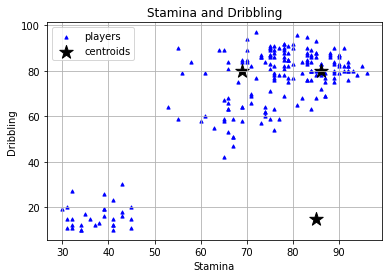

In [102]:
Stamina = test_df['Stamina']
Dribbling = test_df['Dribbling']

plt.title('Stamina and Dribbling')
plt.xlabel('Stamina')
plt.ylabel('Dribbling')
plt.scatter(Stamina, Dribbling, marker='^', c='blue', s=10, label='players')
plt.scatter(C_x, C_y, marker='*', s=200, c='black', label='centroids')
plt.legend(loc='best')
plt.grid()
plt.show()

각 표본에 가까운 중심에 할당한다.
먼저 유클라디안 거리 계산 함수를 만들고, 각 군집의 중심을 새롭게 계산한다.

In [103]:
def distance(a, b):
    return np.sqrt(np.sum(np.power((a - b), 2)))

C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
flag = distance(C, C_old)

print('C_old : ', C_old)
print('flag : ', flag)

C_old :  [[0. 0.]
 [0. 0.]
 [0. 0.]]
flag :  180.01944339431782


각 군집의 중심을 새롭게 계산한다.
중심좌표 간의 거리를 계산해서 `flag`가 `0`이 될 때까지 계산을 반복한다.
`flag`가 `0`이 된다는 것은 군집 중심의 좌표에 변화가 없다는 의미이다.

선수들이 자신의 소속 집단이 어디인지 한눈에 알 수 있도록 군집화 결과를 시각화한다.
한 이터레이션이 지날 때마다 중심좌표와 중심좌표에 인접한 선수의 군집이 변하는 것을 볼 수 있다.

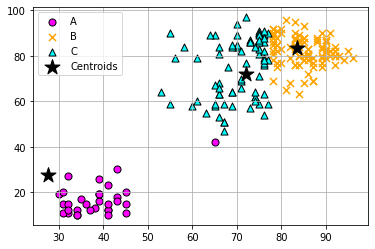

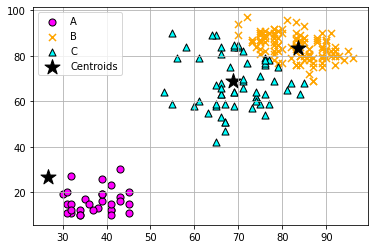

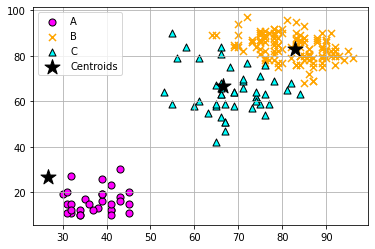

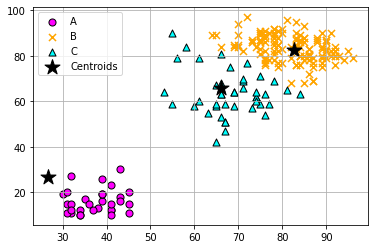

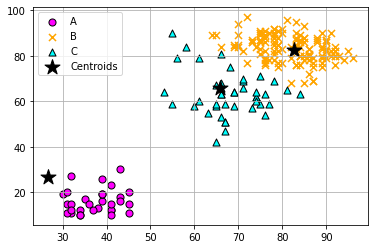

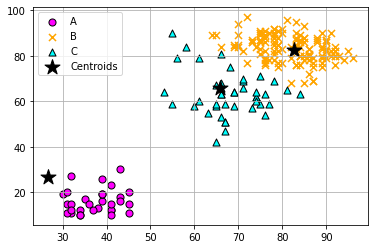

In [104]:
from copy import deepcopy

distances = []
while flag != 0:
    for i in range(len(X)):
        for j in range(3):
            temp = distance(X[i], C[j])
            distances.append(temp)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        distances = []

    C_old = deepcopy(C)

    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points)

    flag = distance(C, C_old)

    plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s=50, c='magenta', marker='o', edgecolors='black', label='A')
    plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s=50, c='orange', marker='x', edgecolors='black', label='B')
    plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s=50, c='cyan', marker='^', edgecolors='black', label='C')
    plt.scatter(C[:, 0], C[:, 1], s=250, c='black', marker='*', edgecolors='black', label='Centroids')

    plt.legend()
    plt.grid()
    plt.show()
